In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

In [38]:
df=pd.read_csv("D:/credit_card_fraud_dataset.csv")
print(df.columns)
print(df.isnull().sum())

Index(['TransactionID', 'TransactionDate', 'Amount', 'MerchantID',
       'TransactionType', 'Location', 'IsFraud'],
      dtype='object')
TransactionID      0
TransactionDate    0
Amount             0
MerchantID         0
TransactionType    0
Location           0
IsFraud            0
dtype: int64


In [40]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')
df['year'] = df['TransactionDate'].dt.year
df['month'] = df['TransactionDate'].dt.month
df['day'] = df['TransactionDate'].dt.day
df['hour'] = df['TransactionDate'].dt.hour
df['minute'] = df['TransactionDate'].dt.minute
df['second'] = df['TransactionDate'].dt.second
df = df.drop('TransactionDate', axis=1)


In [42]:
df = pd.get_dummies(df, columns=['TransactionType', 'Location'], drop_first=True)


In [44]:
X = df.drop('IsFraud', axis=1)  # Features
y = df['IsFraud'] 
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)
scaler = StandardScaler()
X_res = scaler.fit_transform(X_res)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


In [48]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [49]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

In [52]:
rf_roc_auc = roc_auc_score(y_test, rf_preds)
xgb_roc_auc = roc_auc_score(y_test, xgb_preds)
rf_accuracy = accuracy_score(y_test, rf_preds)
xgb_accuracy = accuracy_score(y_test, xgb_preds)

In [54]:
print(f"Random Forest - ROC-AUC: {rf_roc_auc:.4f}, Accuracy: {rf_accuracy:.4f}")
print(f"XGBoost - ROC-AUC: {xgb_roc_auc:.4f}, Accuracy: {xgb_accuracy:.4f}")

Random Forest - ROC-AUC: 0.9943, Accuracy: 0.9943
XGBoost - ROC-AUC: 0.9609, Accuracy: 0.9609


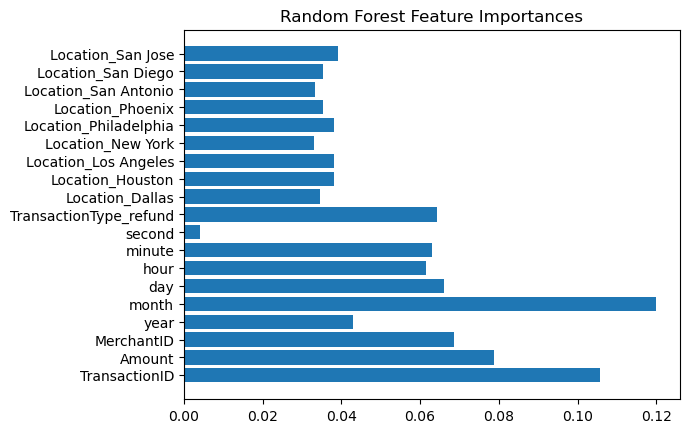

In [56]:
rf_importances = rf_model.feature_importances_
plt.barh(range(len(rf_importances)), rf_importances)
plt.yticks(range(len(rf_importances)), X.columns)
plt.title("Random Forest Feature Importances")
plt.show()

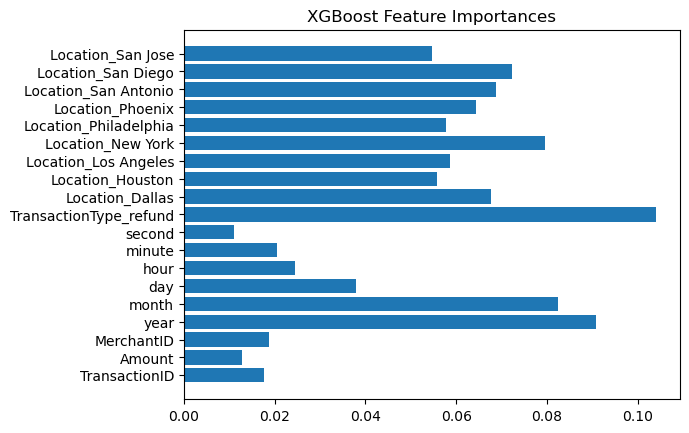

In [58]:
xgb_importances = xgb_model.feature_importances_
plt.barh(range(len(xgb_importances)), xgb_importances)
plt.yticks(range(len(xgb_importances)), X.columns)
plt.title("XGBoost Feature Importances")
plt.show()

In [60]:
comparison_df = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost'],
    'ROC-AUC': [rf_roc_auc, xgb_roc_auc],
    'Accuracy': [rf_accuracy, xgb_accuracy]
})

print("\nModel Comparison:")
print(comparison_df)



Model Comparison:
           Model   ROC-AUC  Accuracy
0  Random Forest  0.994348  0.994343
1        XGBoost  0.960879  0.960859


In [62]:
'''
Analysis:
- The Random Forest model achieves a higher ROC-AUC score, suggesting it is better at distinguishing fraudulent transactions from legitimate ones.
- However, the XGBoost model shows higher accuracy, which may indicate that it performs well on overall classification, though possibly at the expense of precision in detecting fraud.
- Both models apspear to rely on similar features, but Random Forest may capture more complex feature interactions compared to XGBoost.
'''


'\nAnalysis:\n- The Random Forest model achieves a higher ROC-AUC score, suggesting it is better at distinguishing fraudulent transactions from legitimate ones.\n- However, the XGBoost model shows higher accuracy, which may indicate that it performs well on overall classification, though possibly at the expense of precision in detecting fraud.\n- Both models appear to rely on similar features, but Random Forest may capture more complex feature interactions compared to XGBoost.\n'